## Model Robustness at The Model Evaluation Stage: Repeated Cross Validation

To enhance the reliability of model performance estimates, we use a repeated cross validation strategy. It addresses the variability in performance estimates due to different data splits, as a result reduces the dependecny of results to the random seed.    

Here, we try to show the impact of not-using/using repeated cross valiation evaluation on the final conclusion about the performance of models. We will use the adapted Diabetes dataset (from sklearn) to the classification in our experiment. 

### Importing Packages and Data Preparation

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Diabetes dataset
data = pd.read_csv("Assignment_dataset.csv")
column_names = data.columns
X = pd.DataFrame(data[column_names.drop("ADMISSION")], columns=data.columns.drop("ADMISSION"))
y = data["ADMISSION"]

# Set a threshold for binary classification (e.g., using the median of y)
threshold = np.median(y)
y_binary = (y > threshold).astype(int)  # 1 for high risk, 0 for low risk

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical= X.select_dtypes(include= ["int64", "float64"]).columns
boolean = X.select_dtypes(include= ["bool"]).columns
categorical = X.select_dtypes(include= ["object"]).columns

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
binary_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical),
        ("cat", categorical_transformer, categorical),
        ("bin", binary_transformer, boolean)
    ]
)

preprocessor.fit(data)
prep_X = preprocessor.transform(data)

### Experiment 1: Using a single run of cross-validation with a specific "random" seed

Here, set the random seed to 2 (indeed, why 2?) and use this specific random seed for splitting data and control random processes in model training (for more reproducibility of resulst!).

In [15]:
clf1 = GradientBoostingClassifier
clf2 = LinearSVC
for random_state in [2,485,39693,10109]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(prep_X, y_binary, test_size=0.2, random_state=random_state)
    # print()
    # Create, fit, and predict using the Gradient Boosting Classifier model
    gbc = clf1(random_state=random_state)
    gbc.fit(X_train, y_train)
    y_pred_gbc = gbc.predict(X_test)


    # Create, fit, and predict using the Linear Support Vector Classifier model
    svc = clf2(random_state=random_state)
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)

    # Calculate accuracy score
    accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
    accuracy_svc = accuracy_score(y_test, y_pred_svc)

    print(f"LinearSVC Accuracy (r_s = {random_state}):", accuracy_svc)
    print(f"GBC Accuracy (r_s = {random_state}):", accuracy_gbc)

LinearSVC Accuracy (r_s = 2): 0.8621420222092344
GBC Accuracy (r_s = 2): 0.8630187025131502
LinearSVC Accuracy (r_s = 485): 0.8598772647574517
GBC Accuracy (r_s = 485): 0.8603156049094097
LinearSVC Accuracy (r_s = 39693): 0.8606078316773816
GBC Accuracy (r_s = 39693): 0.8598407364114553
LinearSVC Accuracy (r_s = 10109): 0.8575029222676798
GBC Accuracy (r_s = 10109): 0.8583796025715955


After this very valid reproducible experiment, we claim and conclude that a Gradient boosting Cladssifer works better thatn a linear support vector classifier in classifying low/high risk diabetes patiens.

In [25]:
random_state = 42
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(prep_X, y_binary, test_size=0.2, random_state=random_state)

# Create and fit the Gradient Boosting Classifier model
# learning_rate 
# n_estimators
# max_depth
for learning_rate in [0.1, 0.05, 0.01]:
    for n_estimators in [50, 100, 150]:
        for max_depth in [1,3,5]:
            gbc = GradientBoostingClassifier(random_state=random_state, )
            gbc.fit(X_train, y_train)
            y_pred_gbc = gbc.predict(X_test)
            print(f"Accuracy (learning_rate = {learning_rate}; n_estimators = {n_estimators}; max_depth = {max_depth}) = {accuracy_score(y_test, y_pred_gbc)}")
    # dtc_accuracy.append(accuracy_score(y_test, y_pred_dtc))

Accuracy (learning_rate = 0.1; n_estimators = 50; max_depth = 1) = 0.8561513734658095


KeyboardInterrupt: 

In [ ]:
random_state = 42
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(prep_X, y_binary, test_size=0.2, random_state=random_state)

# Create and fit the Gradient Boosting Classifier model
# estimator
# n_estimors
# max_samples
# bootstrap

bgc = BaggingClassifier(random_state=random_state, )
bgc.fit(X_train, y_train)

In [ ]:
random_state = 42
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(prep_X, y_binary, test_size=0.2, random_state=random_state)

# Create and fit the Gradient Boosting Classifier model
# criterion
# max_depth
# min_samples_split


dtc = DecisionTreeClassifier(random_state=random_state, )
dtc.fit(X_train, y_train)

### Experiment 2: Repeated Cross Validation

Now, we repeat the same experiment for 100 times using different random seeds and report summary statistics.

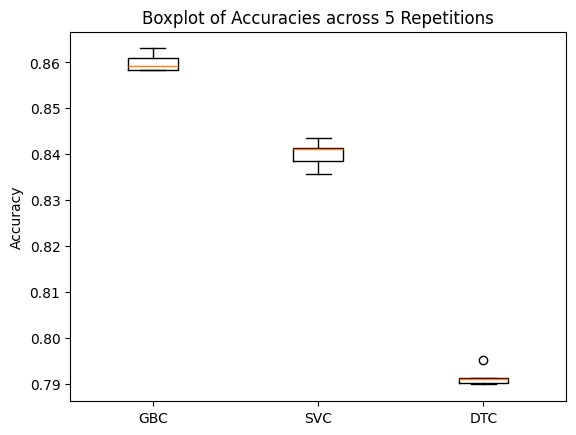

In [24]:
repetitions = 5
clf1 = GradientBoostingClassifier
clf2 = BaggingClassifier
clf3 = DecisionTreeClassifier

# Initialize a list to store accuracy scores
gbc_accuracy = []
svc_accuracy = []
dtc_accuracy = []

# Repeat the train/test split 20 times with different random seeds
for i in range(repetitions):
    random_state = i  # Use i as the random seed
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(prep_X, y_binary, test_size=0.2, random_state=random_state)
    
    # Create and fit the Gradient Boosting Classifier model
    gbc = clf1(random_state=random_state)
    gbc.fit(X_train, y_train)

    svc = clf2(random_state=random_state)
    svc.fit(X_train, y_train)
    
    dtc = clf3(random_state=random_state)
    dtc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_gbc = gbc.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    y_pred_dtc = dtc.predict(X_test)

    # Calculate accuracy score and append it to the list
    gbc_accuracy.append(accuracy_score(y_test, y_pred_gbc))
    svc_accuracy.append(accuracy_score(y_test, y_pred_svc))
    dtc_accuracy.append(accuracy_score(y_test, y_pred_dtc))


# Plot a boxplot of the accuracies
plt.boxplot([gbc_accuracy, svc_accuracy, dtc_accuracy])
plt.title('Boxplot of Accuracies across 5 Repetitions')
plt.xticks([1,2,3],['GBC','SVC','DTC'])
plt.ylabel('Accuracy')
plt.show()


In some repetitions (and with some random seeds) the GBC works better thatn SVC and in some others SVC works better than GBC, but overal SVC seems to be a better choice. This contradicts with the conclution of our previous experiment, but it is more reliable comparison and conclusion, and at the same time it is also reproducible.

**Exercise 5.2**: To check the reliability of results, repeat the second expriment with a different set of random seeds (let's say 100 to 200 or any other arbitrary choice). Is our final conclusion valid one?